Numcomp Project Christoher Chan

# The Setup

## If for whatever reason the project does not want to run in the notebook, follow these steps to run in the terminal. Otherwise, move to "The Project"

Run this first in terminal ↓

"git clone https://github.com/SciML/LinearSolve.jl.git"

"cd LinearSolve.js"

"npm install"

If no work also run this ↓

"cd ~/community-project-Pyxiiz/LinearSolve.jl"
"julia"

Then click "]" and run ↓

"activate ."
"instantiate"

If all else fails, run ↓

using Pkg

-Make a fresh environment

Pkg.activate("LinearSolveEnv", shared=false)

-Install a compatible, registry version of LinearSolve

Pkg.add(name="LinearSolve", version="3.43.0")

-(Optional but helpful)

Pkg.status()


using LinearSolve

A = rand(4, 4) 

b = rand(4) 

prob = LinearProblem(A, b)

sol = solve(prob)

println(sol.u)

# The Project

In [1]:
using Pkg
Pkg.add("LinearSolve")
Pkg.add("BenchmarkTools")
Pkg.activate("LinearSolveEnv")  
Pkg.instantiate()               
using LinearSolve
# There's going to be a big red box. This is normal.
# Make sure the red box stops before moving to the next cell. Otherwise it will not work.
#The last line should be something like "Activating project at ___"

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
  Activating project at `~/community-project-Pyxiiz/LinearSolveEnv`


In [2]:
using LinearSolve, Random, LinearAlgebra, BenchmarkTools

#Defines a 4x4 matrix using a random seed. If you are viewing this, feel free to try different seeds. 
Random.seed!(123)
A = rand(4, 4)
b = rand(4)


prob = LinearProblem(A, b)
sol = solve(prob)
println("Solution vector:")
println(sol.u)


Solution vector:
[7.661734172918683, -20.02410469976003, -18.352962818568376, 16.84229718034895]


In [3]:
residual = A * sol.u - b
println("Residual norm: ", norm(residual))


Residual norm: 4.337535825065249e-15


In [4]:
@btime solve(prob)

  718.800 ns (8 allocations: 976 bytes)


retcode: Default
u: 4-element Vector{Float64}:
   7.661734172918683
 -20.02410469976003
 -18.352962818568376
  16.84229718034895

In [5]:
prob_iterative = LinearProblem(A, b)
sol_iterative = solve(prob_iterative; solver=KrylovJL_GMRES())
println("GMRES solution:")
println(sol_iterative.u)

GMRES solution:
[7.661734172918683, -20.02410469976003, -18.352962818568376, 16.84229718034895]


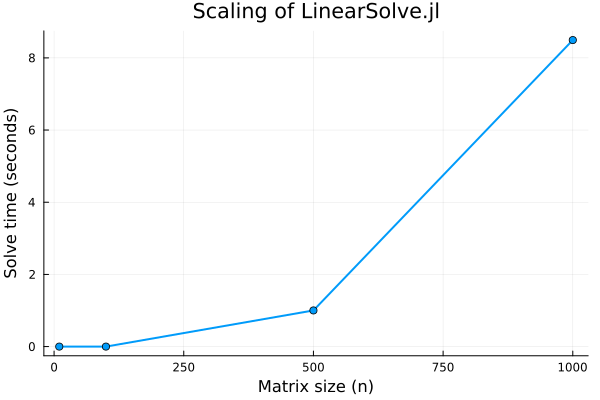

In [6]:
using LinearSolve, BenchmarkTools, Plots

# Matrix sizes 
#Helps visualize the time taken for multiple matrix sizes
sizes = [10, 100, 500, 1000]

# Get the Benchmark solve times for each size
times = [@belapsed solve(LinearProblem(rand($n, $n), rand($n))) for n in sizes]

# Make a scaling plot
plot(
    sizes,
    times,
    xlabel = "Matrix size (n)",
    ylabel = "Solve time (seconds)",
    title = "Scaling of LinearSolve.jl",
    legend = false,
    lw = 2,
    marker = :circle,
    grid = true,
)
#This step takes a really long time so just give it a minute

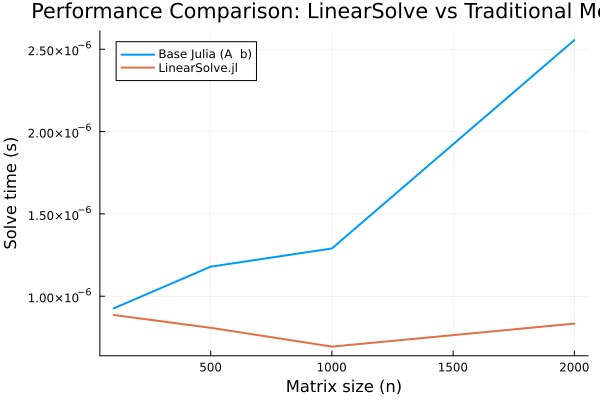

In [7]:
sizes = [100, 500, 1000, 2000]

# Traditional solve using \ function
times_traditional = [@belapsed $A \ $b setup=(A=rand($n,$n); b=rand($n)) for n in sizes]

# LinearSolve.jl approach
times_linearsolve = [@belapsed solve(LinearProblem($A, $b)) setup=(A=rand($n,$n); b=rand($n)) for n in sizes]

plot(
    sizes, [times_traditional times_linearsolve],
    labels=["Base Julia (A \\ b)" "LinearSolve.jl"],
    xlabel="Matrix size (n)",
    ylabel="Solve time (s)",
    legend=:topleft,
    lw=2,
    title="Performance Comparison: LinearSolve vs Traditional Method"
)
#This one also takes a while. 
#Helps visualize the comparison of the \ function(what you would normally use for this problem) and LinearSolve

using LinearSolve, SparseArrays, BenchmarkTools, Plots

# Define matrix sizes: exponential growth, but still safe for your kernel
sizes = round.(Int, 10 .^ (2:0.5:4.3))  # [100, 316, 1000, 3162, 10000, 20000]

# Preallocate results
times_linear_solve = Float64[]
times_backslash = Float64[]

println("Benchmarking LinearSolve.jl vs Julia's built-in solver...\n")

for n in sizes
    # Generate sparse, invertible system
    A = sprand(n, n, 0.001) + I
    b = rand(n)
    prob = LinearProblem(A, b)

    # Benchmark LinearSolve.jl
    t_ls = @belapsed solve($prob)
    push!(times_linear_solve, t_ls)

    # Benchmark Julia built-in solver
    t_bs = @belapsed $A \ $b
    push!(times_backslash, t_bs)

    println("n = $n\tLinearSolve: $(round(t_ls, digits=4))s\tA\\b: $(round(t_bs, digits=4))s")
end

# Plot comparison again
plot(
    sizes, times_linear_solve,
    label="LinearSolve.jl",
    xlabel="Matrix size (n)",
    ylabel="Solve time (s)",
    title="Performance Comparison: LinearSolve.jl vs Built-in Solver",
    lw=2, marker=:circle
)

plot!(
    sizes, times_backslash,
    label="A \\ b (built-in)",
    lw=2, marker=:square,
    xscale=:log10, yscale=:log10
)
#This now uses a silly library called SparceArrays which make huge arrays with little memory by making most of it 0s.
#I hope you like waiting
#Go get some water or something idk

In the last graph, LinearSolve outpreforms the base Julia command. That being said, at the extremely large numbers, they seem to converge again. I wonder if the higher efficency of LinearSolve tapers off towards extremely large numbers or if that is simply the consequence of using such a big graph.